# <font style = "color:rgb(50,120,229)">Hough Transform</font>

In this module, we will learn how to detect **lines** and **circles** in an image, with the help of a technique called **Hough transform**.

## <font style = "color:rgb(50,120,229)">What is Hough transform?</font>

Hough transform is a **feature extraction method** for detecting **simple shapes** such as circles, lines etc. in an image.

A **simple shape** is one that can be represented by only a few parameters. For example, a **line** can be represented by two parameters **(slope, intercept)** and a **circle** has three parameters — the **coordinates of the center** and the **radius** (x, y, r). Hough transform does an excellent job in finding such shapes in an image.

The main **advantage** of using the Hough transform is that it is **insensitive to occlusion**.

Let’s see how Hough transform works by way of an example.

## <font style = "color:rgb(50,120,229)">Hough transform to detect lines in an image</font>

| <img src="https://www.learnopencv.com/wp-content/uploads/2019/03/line-polar-coordinates-1024x677.jpg" alt="A line in polar coordinates" width="600" height="600"/> |
| --- |
| <center>A line in polar coordinates</center> |

## <font style = "color:rgb(50,120,229)">Equation of a line in polar coordinates</font>

From high school math class we know the polar form of a line is represented as:

$$\rho = x \cos(\theta) + y \sin(\theta) \tag{1}$$

- $\rho$ represents the perpendicular distance of the line from the origin in pixels
- $\theta$ is the angle measured in radians, which the line makes with the origin as shown in the figure above

You may be tempted to ask why we did not use the familiar equation of the line given below

$$ y = mx + c$$

The reason is that the slope, $m$, can take values between  $-\infty$ to $+\infty$. **For the Hough transform, the parameters need to be bounded.**

You may also have a follow-up question. In the $(\rho, \theta)$ form, $\theta$ is bounded, but can’t $\rho$ take a value between $0$ to $+\infty$ ? That may be true in theory, but in practice, $\rho$ is also bounded because the image itself is finite.

## <font style = "color:rgb(50,120,229)">Accumulator</font>

When we say that a line in 2D space is parameterized by $\rho$ and $\theta$, it means that if we any pick a $(\rho, \theta)$, it corresponds to a line.

Imagine a 2D array where the x-axis has all possible $\theta$ values and the y-axis has all possible $\rho$ values. **Any bin in this 2D array corresponds to one line.**

| <img src="https://www.learnopencv.com/wp-content/uploads/2019/03/hough-transform-accumulator-1024x1024.png" alt="Accumulator" width="600" height="600"/> |
| --- |
| <center>Accumulator</center> |

This 2D array is called an **accumulator** because we will use the bins of this array to collect evidence about which lines exist in the image. The top left cell corresponds to a $(-R, 0)$ and the bottom right corresponds to $(R, \pi)$.

We will see in a moment that the value inside the bin $(\rho, \theta)$ will increase as more evidence is gathered about the presence of a line with parameters $\rho$ and $\theta$.

## <font style = "color:rgb(50,120,229)">How to detect lines in an image</font>

The following steps are performed to detect lines in an image.

### <font style = "color:rgb(8,133,37)">Step 1 : Initialize Accumulator</font>

First, we need to create an accumulator array. The number of cells you choose to have is a design decision. Let’s say you chose a 10×10 accumulator. It means that $\rho$ can take only 10 distinct values and the $\theta$ can take 10 distinct values, and therefore you will be able to detect 100 different kinds of lines. The size of the accumulator will also depend on the resolution of the image. But if you are just starting, don’t worry about getting it perfectly right. Pick a number like 20×20 and see what results you get.

### <font style = "color:rgb(8,133,37)">Step 2: Detect Edges</font>

Now that we have set up the accumulator, we want to collect evidence for every cell of the accumulator because every cell of the accumulator corresponds to one line.

**How do we collect evidence?**

The idea is that if there is a visible line in the image, an edge detector should fire at the boundaries of the line. These edge pixels provide evidence for the presence of a line.

The output of edge detection is an array of edge pixels $[ (x_1, y_1), (x_2, y_2) ... (x_n, y_n)]$

### <font style = "color:rgb(8,133,37)">Step 3: Voting by Edge Pixels</font>

For every edge pixel $(x, y)$ in the above array, we vary the values of $\theta$ from $0$ to $\pi$ and plug it in **equation 1** to obtain a value for $\rho$.

In the Figure below we vary the $\theta$ for three pixels ( represented by the three colored curves ), and obtain the values for $\rho$ using **equation 1**.

As you can see, these curves intersect at a point indicating that a line with parameters $\theta = 1$ and $\rho =  9.5$ is passing through them.

<img src="https://www.learnopencv.com/wp-content/uploads/2019/03/plot_theta.png" alt="" width="600" height="600"/>

Typically, we have hundreds of edge pixels and the accumulator is used to find the intersection of all the curves generated by the edge pixels.

Let’s see how this is done.

Let’s say our accumulator is 20×20 in size. So, there are 20 distinct values of $\theta$ and so for every edge pixel $(x, y)$, we can calculate 20 $(\rho, \theta)$ pairs by using **equation 1**. The bin of the accumulator corresponding to these 20 values of $(\rho, \theta)$ is incremented.

We do this for every edge pixel and now we have an accumulator that has all the evidence about all possible lines in the image.

We can simply select the bins in the accumulator above a certain threshold to find the lines in the image. If the threshold is higher, you will find fewer strong lines, and if it is lower, you will find a large number of lines including some weak ones.

# <font style = "color:rgb(50,120,229)">HoughLine: How to Detect Lines using OpenCV</font>

In OpenCV, line detection using Hough Transform is implemented in the function [**`HoughLines`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a) and [**`HoughLinesP`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb) [Probabilistic Hough Transform].

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
lines = cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
```

```python
lines = cv.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])
```

**Parameters**


- **`image`** -	8-bit, single-channel binary source image. The image may be modified by the function.
- **`lines`** -	Output vector of lines. Each line is represented by a 2 or 3 element vector $(\rho,\theta)$ or $(\rho,\theta,\text{votes})$ . $\rho$ is the distance from the coordinate origin $(0,0)$ (top-left corner of the image). $\theta$ is the line rotation angle in radians $( 0∼\text{vertical line},\pi/2∼\text{horizontal line} )$. votes is the value of accumulator.
- **`rho`** -	Distance resolution of the accumulator in pixels.
- **`theta`** -	Angle resolution of the accumulator in radians.
- **`threshold`** -	Accumulator threshold parameter. Only those lines are returned that get enough votes $( >\text{threshold} )$.
- **`srn`** -	For the multi-scale Hough transform, it is a divisor for the distance resolution rho . The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn . If both srn=0 and stn=0 , the classical Hough transform is used. Otherwise, both these parameters should be positive.
- **`stn`** -	For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
- **`min_theta`** -	For standard and multi-scale Hough transform, minimum angle to check for lines. Must fall between 0 and max_theta.
- **`max_theta`** -	For standard and multi-scale Hough transform, maximum angle to check for lines. Must fall between min_theta and CV_PI.

In [2]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

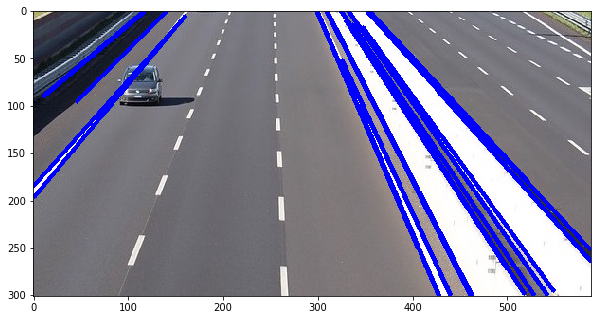

In [12]:
# Read image 
img = cv2.imread(DATA_PATH + 'images/lanes.jpg', cv2.IMREAD_COLOR)
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
plt.imshow(img[:,:,::-1])

#### <font style = "color:rgb(200,0,0)">Note</font>
Bear in mind the quality of detected lines depends heavily on the quality of the edge map. Therefore, in the real world Hough transform is used when you can control the environment and therefore obtain consistent edge maps or when you can train an edge detector for the specific kind of edges you are looking for.

# <font style = "color:rgb(50,120,229)">HoughCircles : Detect circles in an image with OpenCV</font>

In the case of line Hough transform, we required two parameters, $(\theta, \rho)$ but to detect circles, we require three parameters:

- $(x, y)$ coordinates of the center of the circle.
- radius.

As you can imagine, a circle detector will require a **3D accumulator** — one for each parameter.

The equation of a circle is given by

$\begin{align*} (x - x_0)^2 + (y - y_0)^2 = r^2 \end{align*} \tag{2}$

The following steps are followed to detect circles in an image: –

1. Find the edges in the given image with the help of edge detectors (**Canny**).
2. For detecting circles in an image, we set a threshold for the maximum and minimum value of the radius.
3. Evidence is collected in a 3D accumulator array for the presence of circles with different centers and radii.

The function [**`HoughCircles`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) is used in OpenCV to detect the circles in an image.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
circles = cv.HoughCircles( image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
```

**Parameters**


- **`image`** -	8-bit, single-channel binary source image. The image may be modified by the function.
- **`circles`** -	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
- **`method`** -	Detection method. Currently, the only implemented method is **`HOUGH_GRADIENT`**
- **`dp`** -	Inverse ratio of the accumulator resolution to the image resolution. For example, if `dp=1` , the accumulator has the same resolution as the input image. If `dp=2` , the accumulator has half as big width and height.
- **`minDist`** -	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
- **`param1`** -	First method-specific parameter. In case of **`HOUGH_GRADIENT`** , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
- **`param2`** -	Second method-specific parameter. In case of **`HOUGH_GRADIENT`** , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
- **`minRadius`** -	Minimum circle radius.
- **`maxRadius`** -	Maximum circle radius. If `<= 0`, uses the maximum image dimension. If `< 0`, returns centers without finding the radius.

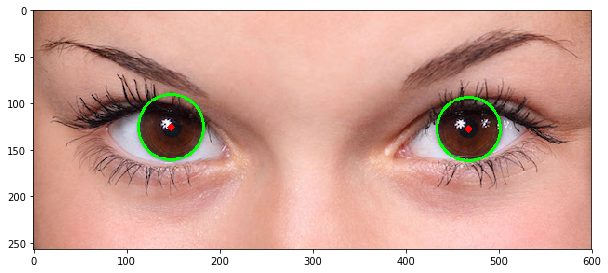

In [33]:
# Read image as gray-scale
img = cv2.imread(DATA_PATH + 'images/circles.jpg', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 50, param1=450, param2=10, minRadius=30, maxRadius=40)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(img[:,:,::-1])